In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from thop import profile 
import matplotlib.pyplot as plt
from PIL import Image
import time
from itertools import count
%matplotlib inline
from IPython import display
import copy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from torchvision import transforms
import pickle
    # display.clear_output(wait=True)
    # display.display(plt.gcf())
%load_ext autoreload
%autoreload 2
import import_ipynb
from utils import get_network, get_dataset

In [2]:
%load_ext autoreload
%autoreload 2
from model_train import compute_el2n, sorted_diff, train_classification, train_synthetic_dataset, continual_learning, cross_generalization, get_accuracy_and_confusion_matrix
# from model_test import get_accuracy_and_confusion_matrix
from utils_ext import get_dataset_ext, get_network_ext, calculate_flops, get_syn_dataloader, plot_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Task 1

## Task 1-1 Train with Original Dataset

### MNIST

In [4]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", 256)
net = get_network_ext('ConvNet', 10, train_dataset)

Epochs: 20/20 Train Acc: 0.99  Test Acc: 0.99


0.9896

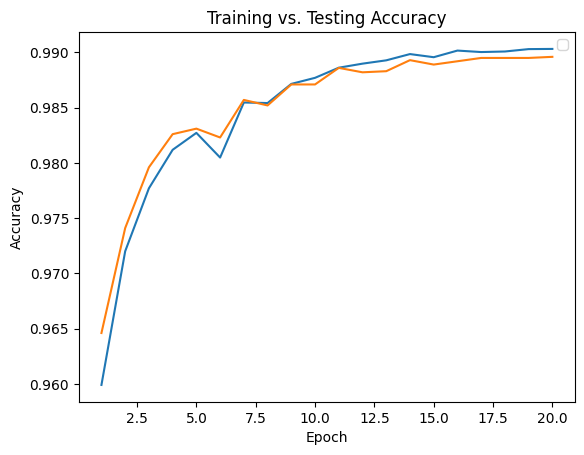

In [5]:
train_classification(net, train_loader, test_loader, 20)

In [6]:
calculate_flops(net, test_loader)

Total FLOP: 968.58 GFLOP
Time taken: 0.3841 seconds
FLOPS: 2521.42 GFLOP/s


### MHIST (full)

In [7]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST_FULL", 32)
net = get_network_ext('ConvNet-7', 2, train_dataset)

Epochs: 20/20 Train Acc: 0.999  Test Acc: 0.815


0.8147389969293757

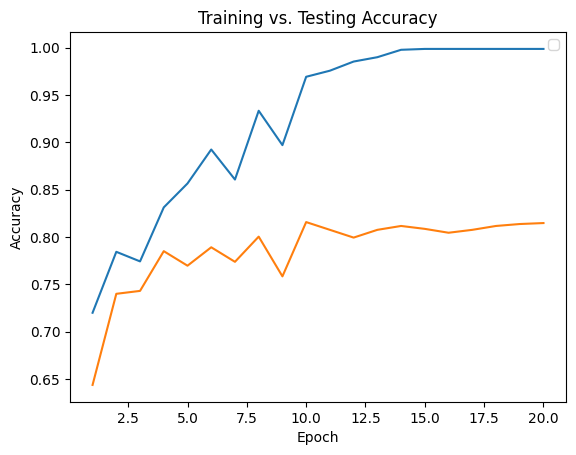

In [8]:
train_classification(net, train_loader, test_loader, 20)

In [9]:
calculate_flops(net, test_loader)

Total FLOP: 5159.96 GFLOP
Time taken: 1.4868 seconds
FLOPS: 3470.57 GFLOP/s


### MHIST (simplified)

In [10]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST", 32)
net = get_network_ext('ConvNet-6', 2, train_dataset)

Epochs: 20/20 Train Acc: 0.984  Test Acc: 0.781


0.7809621289662231

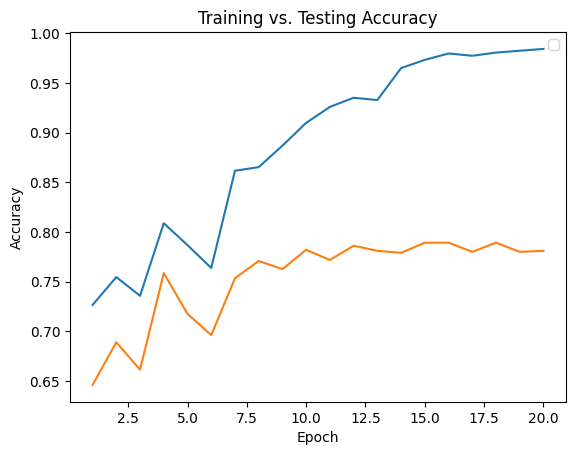

In [11]:
train_classification(net, train_loader, test_loader, 20)

In [12]:
calculate_flops(net, test_loader)

Total FLOP: 1316.17 GFLOP
Time taken: 0.4183 seconds
FLOPS: 3146.45 GFLOP/s


In [13]:
del net
torch.cuda.empty_cache()

## Task 1-2: Train Synthetic Images Initialized from Sampling Real Dataset

### MNIST

In [ ]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", 256)

K=400
init='real'
ipc=10
model = "ConvNet"
batch_size = 256
T = 10
save_path = os.path.join('runs', 'mnist', 'real')
save_intervals = 100

img_syn = train_synthetic_dataset(train_dataset, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init, save_path=save_path, save_intervals=save_intervals)

d:\Pas\UofT\ECE1512\ProjectA\code2\utils_ext.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = filename.split('_')[0].split('.')[0]


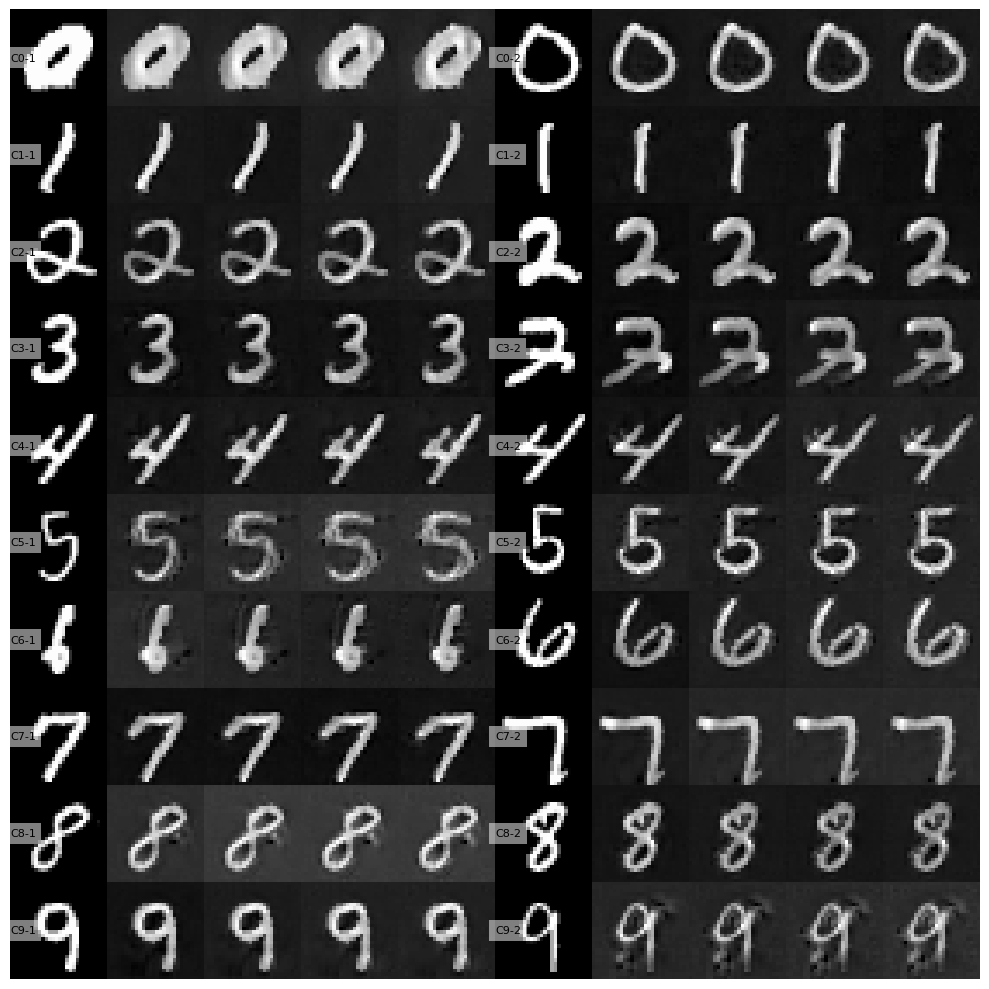

In [14]:
plot_images(os.path.join('runs', 'mnist', 'real'), 'mnist')

### MHIST

In [ ]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST", 32)

K=10000
init='real'
ipc=20
model = "ConvNet-6"
batch_size = 32
T = 10
save_path = os.path.join('runs', 'mhist', 'real')
save_intervals = 100

img_syn = train_synthetic_dataset(train_dataset, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init, save_path=save_path, save_intervals=save_intervals)

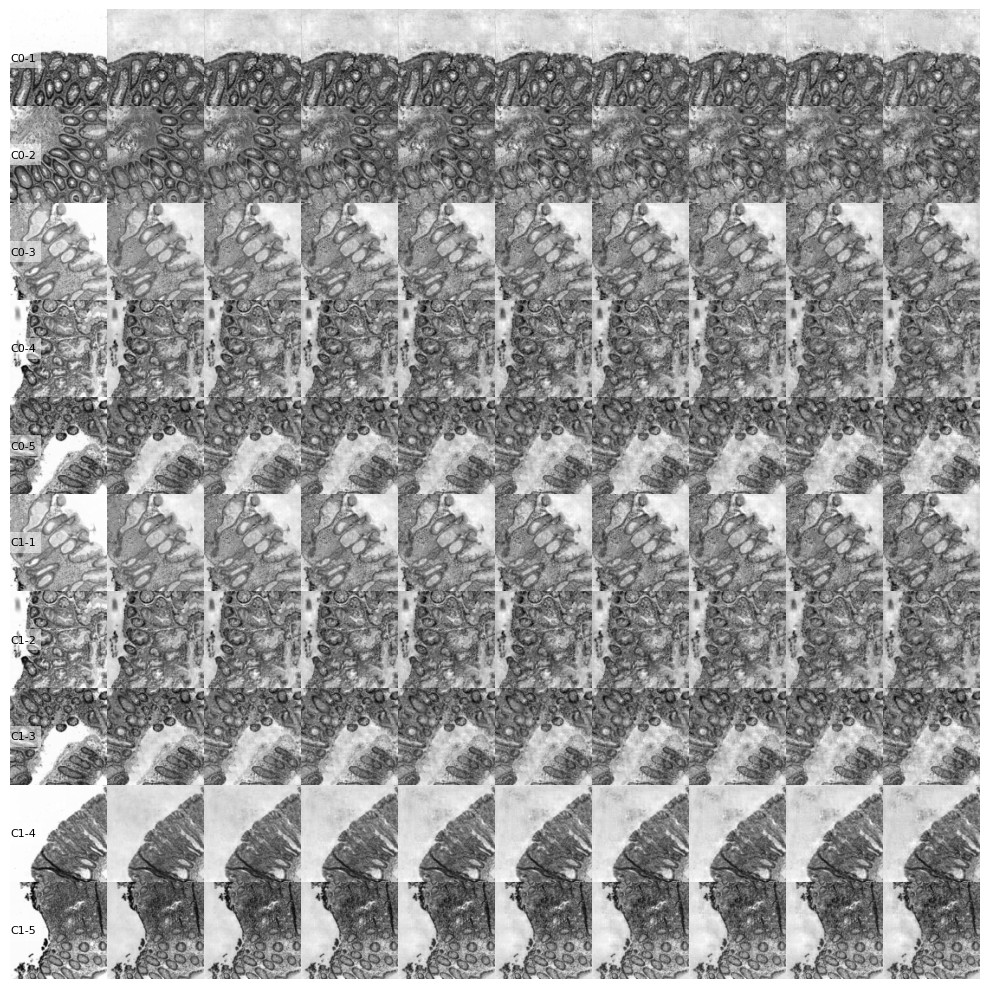

In [15]:
plot_images(os.path.join('runs', 'mhist', 'real'), 'mhist')

## Task 1-3: Train Synthetic Images Initialized from Gausian Noise

### MNIST

In [ ]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", 256)

K=400
init='noise'
ipc=10
model = "ConvNet"
batch_size = 256
T = 10
save_path = os.path.join('runs', 'mnist', 'noise')
save_intervals = 100

img_syn = train_synthetic_dataset(train_dataset, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init, save_path=save_path, save_intervals=save_intervals)

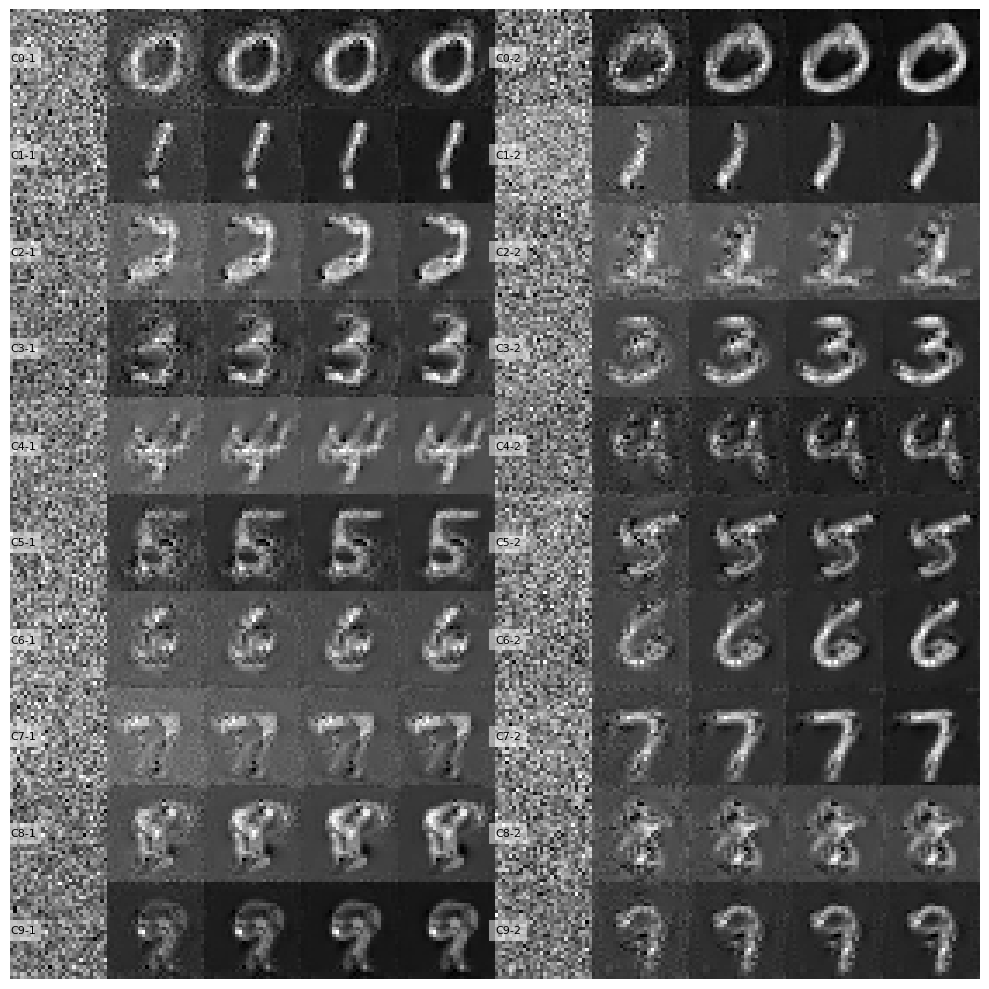

In [16]:
plot_images(os.path.join('runs', 'mnist', 'noise'), 'mnist')

### MHIST

In [ ]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST", 32)

K=25000
init='noise'
ipc=5
model = "ConvNet-6"
batch_size = 32
T = 10
save_path = os.path.join('runs', 'mhist', 'noise')
save_intervals = 100

img_syn = train_synthetic_dataset(train_dataset, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init, save_path=save_path, save_intervals=save_intervals)

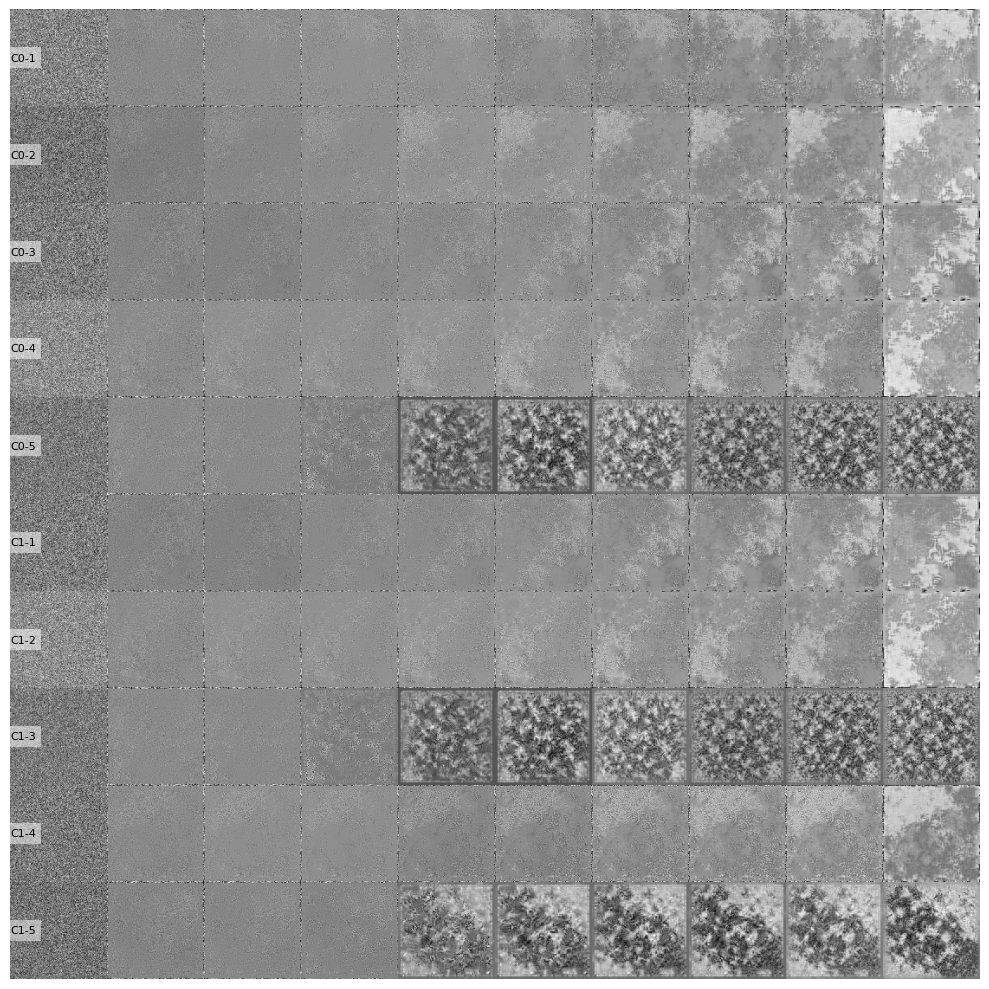

In [17]:
plot_images(os.path.join('runs', 'mhist', 'noise'), 'mhist')

## Task 1-4 Train on Condensed Images

### MNIST - Random Sample

In [18]:
batch_size = 256
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", batch_size)
model = 'ConvNet'

Epochs: 20/20 Train Acc: 0.81  Test Acc: 0.79


0.7904

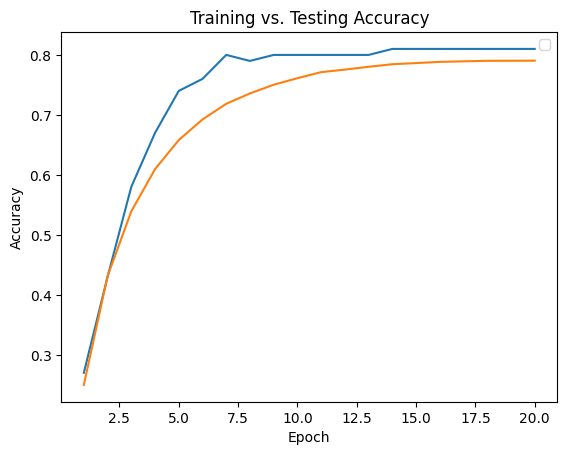

In [19]:
folder_path = os.path.join('runs','mnist','real')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 10, batch_size)
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 20)

Epochs: 100/100 Train Acc: 0.99  Test Acc: 0.91


0.9097

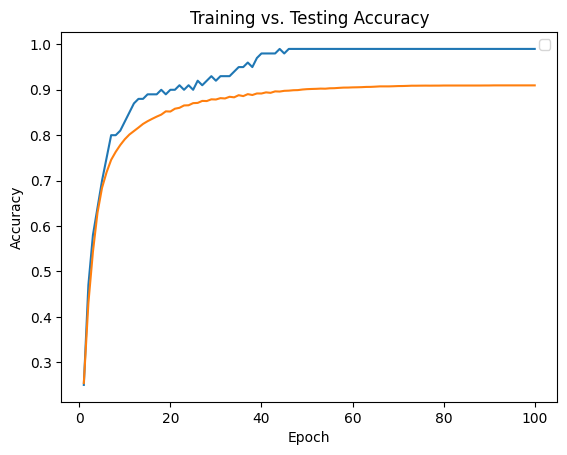

In [20]:
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 100)

### MNIST - Noise

Epochs: 20/20 Train Acc: 0.87  Test Acc: 0.785


0.7847

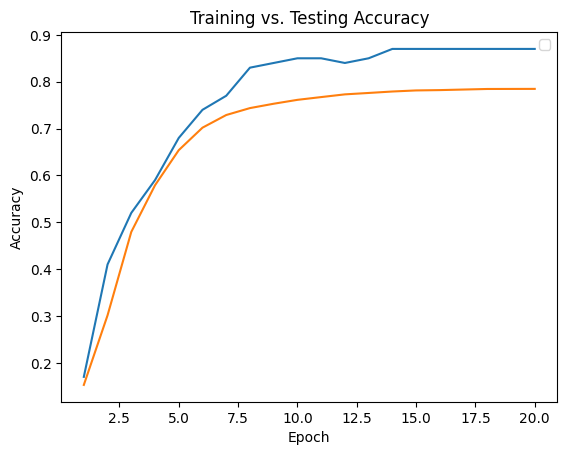

In [21]:
folder_path = os.path.join('runs','mnist','noise')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 10, batch_size)
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 20)

Epochs: 100/100 Train Acc: 0.99  Test Acc: 0.888


0.8882

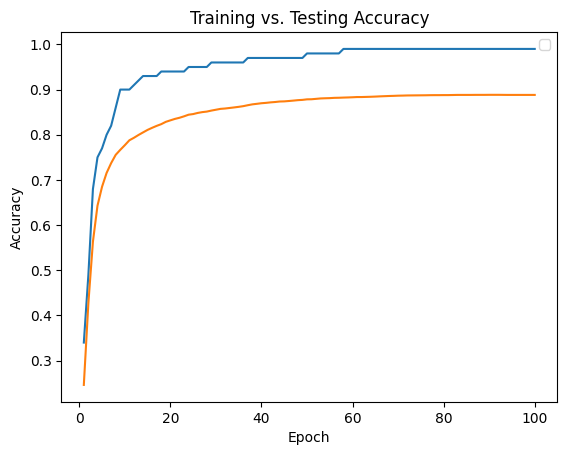

In [22]:
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 100)

### MHIST - Random Sample

In [23]:
batch_size = 32
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST", batch_size)
model = 'ConvNet-6'

Epochs: 20/20 Train Acc: 1.0  Test Acc: 0.571


0.5711361310133061

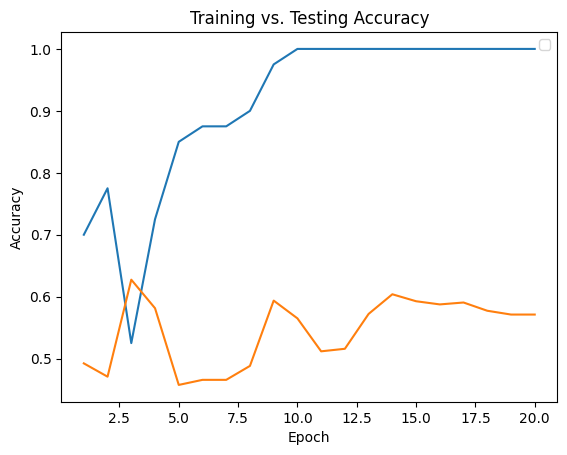

In [24]:
folder_path = os.path.join('runs','mhist','real')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 20, batch_size)
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 20)

Epochs: 100/100 Train Acc: 1.0  Test Acc: 0.662


0.6622313203684749

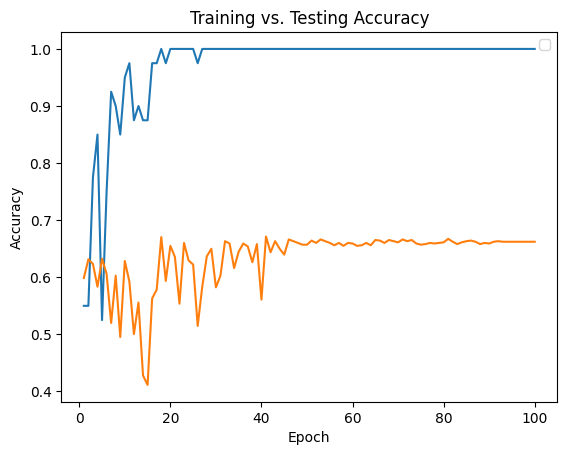

In [25]:
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 100)

### MHIST - Noise

Epochs: 20/20 Train Acc: 1.0  Test Acc: 0.432


0.43193449334698053

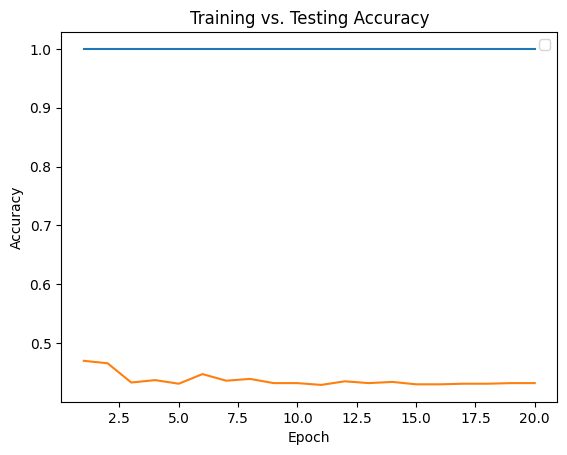

In [27]:
folder_path = os.path.join('runs','mhist','noise')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 5, batch_size)
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 20)

Epochs: 100/100 Train Acc: 1.0  Test Acc: 0.407


0.40736949846468784

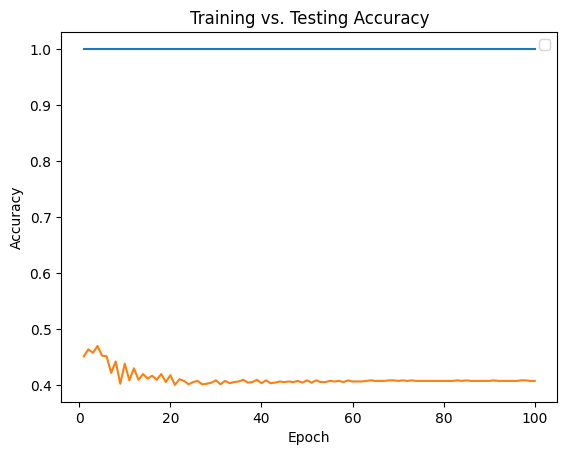

In [28]:
net = get_network_ext(model, num_classes, train_dataset)
train_classification(net, syn_train_loader, test_loader, 100)

## Task 1-5 Cross Generalization

### MNIST

In [6]:
batch_size=256
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", batch_size)
folder_path = os.path.join('runs','mnist','real')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 10, batch_size)

C:\Users\acer\AppData\Local\Temp\ipykernel_25048\356376549.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  img_syn = torch.load(os.path.join(folder_path,file))


In [7]:
accs, conf_mat = cross_generalization(['LeNet', 'AlexNet', 'VGG11'], syn_train_loader, test_loader, num_epochs=[20, 100, 1000], num_classes=num_classes)

display.clear_output()
plt.close('all')

for (model, epochs), acc in accs.items():
    if isinstance(acc, float):
        print(f"{model} Epochs {epochs} - Acc {acc:.4f}")
    else:
        acc, epochs = acc
        print(f"{model} Epochs {epochs} - Acc {acc:.4f}")

# for (model, epochs), conf in conf_mat.items():
#     print(f"{model} Epochs {epochs} \n{conf}")

LeNet Epochs 20 - Acc 0.0892
LeNet Epochs 100 - Acc 0.2181
LeNet Epochs 480 - Acc 0.8496
AlexNet Epochs 20 - Acc 0.1122
AlexNet Epochs 100 - Acc 0.2044
AlexNet Epochs 412 - Acc 0.8488
VGG11 Epochs 20 - Acc 0.8093
VGG11 Epochs 100 - Acc 0.8830
VGG11 Epochs 201 - Acc 0.8881


### MHIST

In [8]:
batch_size = 32
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MHIST", batch_size)
folder_path = os.path.join('runs','mhist','real')
files = [file for file in os.listdir(folder_path) if file.endswith('.pt')]
file = sorted(files, key=lambda x: int(x.replace('.pt','').split('_')[0]))[-1]
img_syn = torch.load(os.path.join(folder_path,file))
syn_train_loader = get_syn_dataloader(img_syn, num_classes, 20, batch_size)

C:\Users\acer\AppData\Local\Temp\ipykernel_25048\4034711047.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  img_syn = torch.load(os.path.join(folder_path,file))


In [9]:
accs, conf_mat = cross_generalization(['LeNet', 'AlexNet', 'VGG11'], syn_train_loader, test_loader, num_epochs=[20, 100, 1000], num_classes=num_classes)

display.clear_output()
plt.close('all')

for (model, epochs), acc in accs.items():
    if isinstance(acc, float):
        print(f"{model} Epochs {epochs} - Acc {acc:.4f}")
    else:
        acc, epochs = acc
        print(f"{model} Epochs {epochs} - Acc {acc:.4f}")

for (model, epochs), conf in conf_mat.items():
    print(f"{model} Epochs {epochs} \n{conf}")

LeNet Epochs 20 - Acc 0.3685
LeNet Epochs 100 - Acc 0.6274
LeNet Epochs 1000 - Acc 0.6070
AlexNet Epochs 20 - Acc 0.6315
AlexNet Epochs 100 - Acc 0.5660
AlexNet Epochs 1000 - Acc 0.5404
VGG11 Epochs 20 - Acc 0.5803
VGG11 Epochs 100 - Acc 0.5814
VGG11 Epochs 201 - Acc 0.6090
LeNet Epochs 20 
[[  0 617]
 [  0 360]]
LeNet Epochs 100 
[[607  10]
 [354   6]]
LeNet Epochs 1000 
[[428 189]
 [195 165]]
AlexNet Epochs 20 
[[617   0]
 [360   0]]
AlexNet Epochs 100 
[[469 148]
 [276  84]]
AlexNet Epochs 1000 
[[365 252]
 [197 163]]
VGG11 Epochs 20 
[[352 265]
 [145 215]]
VGG11 Epochs 100 
[[386 231]
 [178 182]]
VGG11 Epochs 1000 
[[395 222]
 [160 200]]


## Task 1-6 Application - Continual Learning

In [33]:
batch_size = 256
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", batch_size)
model = 'ConvNet'

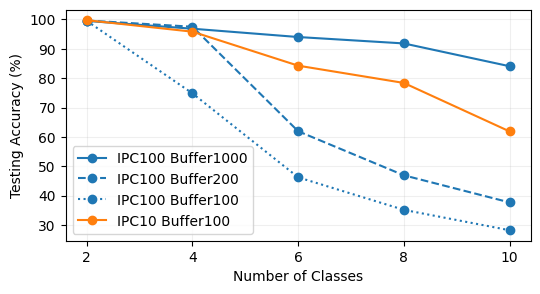

In [34]:
img_syn = torch.load(os.path.join('runs', 'mnist', 'task2_1','100_0_easy_0.pt'))
c1, a1 = continual_learning(img_syn, test_loader)
c2, a2 = continual_learning(img_syn, test_loader, buffer_size=200)
c3, a3 = continual_learning(img_syn, test_loader, buffer_size=100)
img_syn = torch.load(os.path.join('runs', 'mnist', 'task2_1','10_0_easy_0.pt'))
c4, a4 = continual_learning(img_syn, test_loader, buffer_size=100)
plt.close()
display.clear_output(wait=True)
plt.figure(figsize=(6,3))
plt.plot(c1, [acc*100 for acc in a1], '-o', color=plt.cm.tab10(0), label='IPC100 Buffer1000')
plt.plot(c2, [acc*100 for acc in a2], '--o', color=plt.cm.tab10(0), label='IPC100 Buffer200')
plt.plot(c3, [acc*100 for acc in a3], ':o', color=plt.cm.tab10(0), label='IPC100 Buffer100')
plt.plot(c4, [acc*100 for acc in a4], '-o', color=plt.cm.tab10(1), label='IPC10 Buffer100')
plt.xticks(c1)
plt.xlabel('Number of Classes')
plt.ylabel('Testing Accuracy (%)')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

# Task 2

## Task 2-1 PAD with Vary Samples Removal

In [ ]:
train_loader, train_loader_no_shuf, test_loader, train_dataset, num_classes = get_dataset_ext("MNIST", 256)
net = get_network_ext('ConvNet', 10, train_dataset)
train_classification(net, train_loader, test_loader, 20)
scores, labels = compute_el2n(net, train_loader_no_shuf)
tdict = sorted_diff(scores, labels)

In [ ]:
folder_path = os.path.join('runs', 'mnist', 'task2_1')
K=100
init='real'
ipc=10
model = "ConvNet"
batch_size=256 
num_classes=10
T=10
alphas = [0]
for ipc in [2, 10, 50, 100]:
    for alpha in alphas:
        for remove in ['easy', 'hard']:
            for p_remove in [0, 0.10, 0.25, 0.50]:
                if p_remove==0:
                    if remove=='hard':
                        continue
                    else:
                        img_syn = train_synthetic_dataset(train_dataset, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init,
                                                p_remove=p_remove, remove_samples=remove)
                
                else:
                    img_syn = train_synthetic_dataset(train_dataset, tdict=tdict, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init,
                                                p_remove=p_remove, remove_samples=remove)
                torch.save(img_syn, os.path.join(folder_path, f"{ipc}_{alpha}_{remove}_{p_remove}.pt"))

In [ ]:
folder_path = os.path.join('runs', 'mnist', 'task2_1')
batch_size =256
result_dict = {'easy': {}, 'hard':{}}
for f in os.listdir(folder_path):
    if not f.endswith('.pt'):
        continue
    img_syn = torch.load(os.path.join(folder_path, f))
    ipc = img_syn.shape[0]//num_classes
    syn_train_loader = get_syn_dataloader(img_syn, num_classes, ipc, batch_size)
    net = get_network_ext('ConvNet', num_classes, train_dataset)
    acc = train_classification(net, syn_train_loader, test_loader, 100) #9s/1ep
    ipc, alpha, remove, p_remove = f.replace('.pt','').split('_')
    ipc, alpha, p_remove = int(ipc), float(alpha), float(p_remove)
    if not ipc in result_dict[remove]:
        result_dict[remove][ipc]=[]
    result_dict[remove][ipc].append((p_remove, acc))
    if p_remove==0:
        if not ipc in result_dict['hard']:
            result_dict['hard'][ipc]=[]
        result_dict['hard'][ipc].append((p_remove, acc))
    

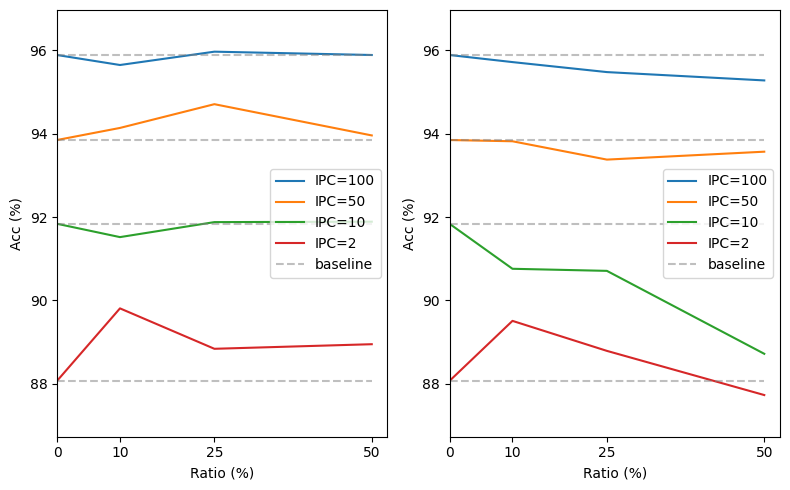

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
accs = [acc for k1, v1 in result_dict.items() for k2, v2 in v1.items() for k3, acc in v2]
min_acc, max_acc = min(accs)-0.01, max(accs)+0.01
for i, (remove, v) in enumerate(result_dict.items()):
    for ipc in sorted(v.keys(), reverse=True):
        vals = v[ipc]
        p_removes, accs = zip(*sorted(vals))
        p_removes = [p*100 for p in p_removes]
        accs = [acc*100 for acc in accs]
        axes[i].plot(p_removes, accs, label=f"IPC={ipc}")
        axes[i].plot(p_removes, accs[:1]*len(p_removes), '--', color='grey', alpha=0.5)
    axes[i].plot([], [], '--', color='grey', alpha=0.5, label='baseline')
    axes[i].set_xlabel('Ratio (%)')
    axes[i].set_xticks(p_removes)
    axes[i].set_xlim(left=0)
    axes[i].set_ylabel('Acc (%)')
    axes[i].set_ylim((min_acc*100, max_acc*100))
    axes[i].legend(loc='center right')
plt.tight_layout()


## Task 2-2 PAD with Vary $\alpha$


In [ ]:
folder_path = os.path.join('runs', 'mnist', 'task2_2')
K=100
init='real'
ipc=10
model = "ConvNet"
batch_size=256 
num_classes=10
T=10
remove='easy'
for ipc in [2, 10, 50, 100]:
    if ipc==2:
        p_remove=0.10
    else:
        p_remove=0.25
    for alpha in [0.0, 0.25, 0.50, 0.75]:
        img_syn = train_synthetic_dataset(train_dataset, tdict=tdict, T=T, model=model, ipc=ipc, num_classes=num_classes, batch_size=batch_size, K=K, init=init,
                                        p_remove=p_remove, alpha=alpha, remove_samples=remove)
        torch.save(img_syn, os.path.join(folder_path, f"{ipc}_{alpha}_{remove}_{p_remove}.pt"))

Epochs: 100/100 Train Acc: 0.95  Test Acc: 0.941


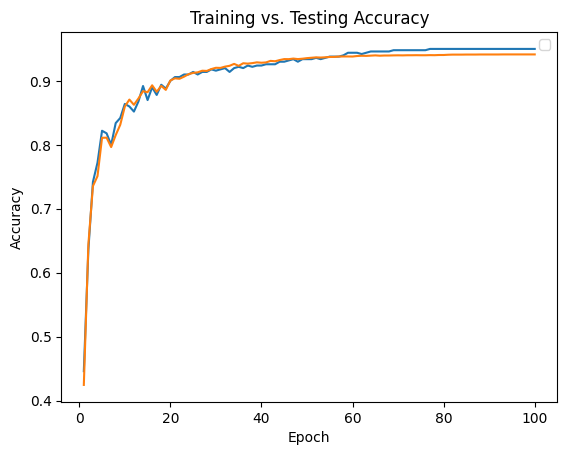

In [35]:
folder_path = os.path.join('runs', 'mnist', 'task2_2')
batch_size =256
result_dict = {20: {}, 100:{}}
for f in os.listdir(folder_path):
    if not f.endswith('.pt'):
        continue
    img_syn = torch.load(os.path.join(folder_path, f))
    ipc = img_syn.shape[0]//num_classes
    syn_train_loader = get_syn_dataloader(img_syn, num_classes, ipc, batch_size)
    for epochs in [20, 100]:
        net = get_network_ext('ConvNet', num_classes, train_dataset)
        acc = train_classification(net, syn_train_loader, test_loader, num_epochs=epochs) #9s/1ep
        ipc, alpha, remove, p_remove = f.replace('.pt','').split('_')
        ipc, alpha, p_remove = int(ipc), float(alpha), float(p_remove)
        if not ipc in result_dict[epochs]:
            result_dict[epochs][ipc]=[]
        result_dict[epochs][ipc].append((alpha, acc))

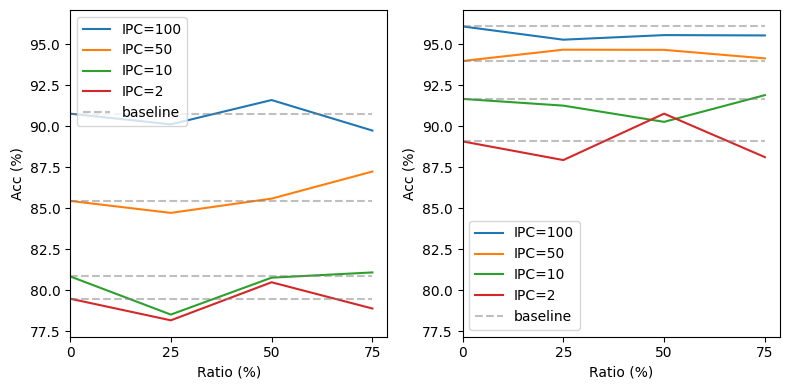

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
accs = [acc for k1, v1 in result_dict.items() for k2, v2 in v1.items() for k3, acc in v2]
min_acc, max_acc = min(accs)-0.01, max(accs)+0.01
for i, (remove, v) in enumerate(result_dict.items()):
    for ipc in sorted(v.keys(), reverse=True):
        vals = v[ipc]
        x, accs = zip(*sorted(vals))
        x = [p*100 for p in x]
        accs = [acc*100 for acc in accs]
        axes[i].plot(x, accs, label=f"IPC={ipc}")
        axes[i].plot(x, accs[:1]*len(x), '--', color='grey', alpha=0.5)
    axes[i].plot([], [], '--', color='grey', alpha=0.5, label='baseline')
    axes[i].set_xlabel('Ratio (%)')
    axes[i].set_xticks(x)
    axes[i].set_xlim(left=0)
    axes[i].set_ylabel('Acc (%)')
    axes[i].set_ylim((min_acc*100, max_acc*100))
    axes[i].legend(loc='best')
plt.tight_layout()